# Práctica 1. Parte 0. Ejercicio 1

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from math import inf

Creamos variables con los valores para este ejercicio particular.

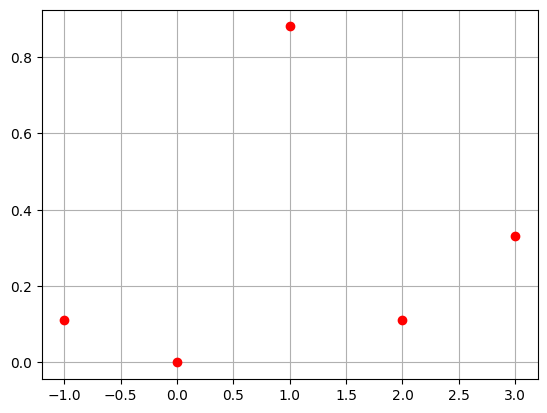

In [87]:
puntos = [[-1, 0.11], [0, 0], [1, 0.88], [2, 0.11], [3, 0.33]]
x = [p[0] for p in puntos]
y = [p[1] for p in puntos]
f1 = [1 for punto in puntos]
f2 = x
f3 = [xs**2 for xs in x]

# Representamos los puntos:
plt.plot(x, y, "ro")
plt.grid()
plt.show()

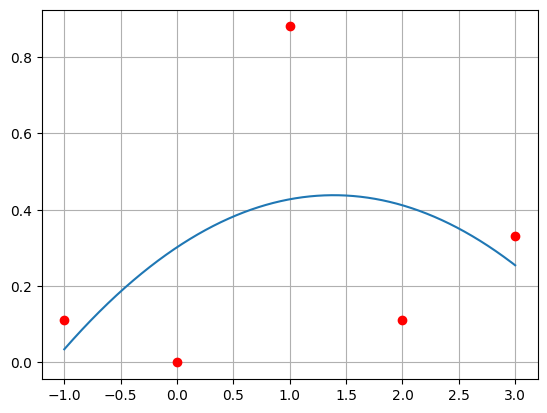

In [88]:
# Caculamos las matrices que nos proporcionan el vector a
B = np.array([f1, f2, f3]).T
BT = B.T
y = np.array(y)
BTB_1 = np.linalg.inv(np.matmul(BT, B))
BTB_1BT = np.matmul(BTB_1, BT)
a = np.matmul(BTB_1BT, y)

# Representamos la función:
x_fun = np.linspace(-1, 3, 10000)
y_fun = a[0] + a[1] * x_fun + a[2] * x_fun**2
plt.plot(x, y, "ro")
plt.grid()
plt.plot(x_fun, y_fun)
plt.show()

[0.00568947 0.09103151 0.2048209  0.09103151 0.00568947]
Error cuadrático medio:  0.07965257142857143


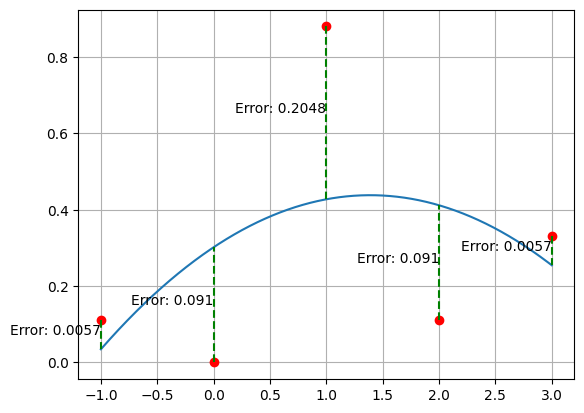

In [89]:
# Calculamos los y estimados (y_hat) para los puntos originales
y_hat = a[0] + a[1] * np.array(x) + a[2] * np.array(x)**2
errores = np.power(y_hat - y, 2)
print(errores)
suma_errores = np.sum(errores)
error_cuadratico_medio = suma_errores / len(x)
print("Error cuadrático medio: ", error_cuadratico_medio)

# Ahora dibujamos la función, los puntos y los errores
# Dibujamos las líneas verticales que representan los errores
plt.grid()
plt.plot(x_fun, y_fun, label="Función ajustada")  # La curva ajustada
plt.plot(x, y, "ro", label="Puntos originales")   # Los puntos originales
for i, punto in enumerate(puntos):
    plt.plot([x[i], x[i]], [y[i], y_hat[i]], "g--")  # Línea de error
    error = np.round(errores[i], 4)  # Redondeamos el error para mostrarlo
    plt.text(x[i], (y[i] + y_hat[i]) / 2, f'Error: {error}', ha='right')  # Etiqueta del error
plt.show()

In [90]:
# Calculamos ahora f(2,5)
f_2_5 = a[0] + a[1] * 2.5 + a[2] * 2.5**2
print("f(2.5) = ", f_2_5)

f(2.5) =  0.3508214285714285


# 2 Enunciado
Aproximar la nube de puntos {(1, 1, 1.1),(2, 2, 3.9),(3, 3, 8.7} mediante la función g(x) = a0 + a1 x utilizando
## 1. el método desarrollado en la sección anterior

Coeficientes a =  [-3.03333333  3.8       ]
Valores estimados =  [0.76666667 4.56666667 8.36666667]
Errores cuadráticos: [0.11111111 0.44444444 0.11111111]
Error cuadrático medio:  0.22222222222222232


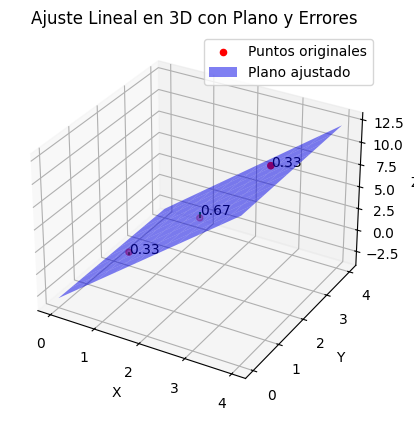

In [91]:
# Con el método anterior (matrices)
puntos = [[1, 1, 1.1], [2, 2, 3.9], [3, 3, 8.7]]
x = [p[0] for p in puntos]
y = [p[1] for p in puntos]
z = [p[2] for p in puntos] # Este es el valor que aproximaremos
# g(x) = a0 +a1x
f1 = [1 for punto in puntos]
f2 = x

# Caculamos las matrices que nos proporcionan el vector a
B = np.array([f1, f2]).T
BT = B.T
y = np.array(y)
BTB_1 = np.linalg.inv(np.matmul(BT, B))
BTB_1BT = np.matmul(BTB_1, BT)
a = np.matmul(BTB_1BT, z) # En este caso z es el valor que queremos aproximar
print("Coeficientes a = ", a)

# Calculamos los z estimados (z_hat) para los puntos originales
z_hat = a[0] + a[1] * np.array(x)
print("Valores estimados = ", z_hat)
errores = np.square(z_hat - z)
print("Errores cuadráticos:", errores)
error_cuadratico_medio = np.mean(errores)
print("Error cuadrático medio: ", error_cuadratico_medio)

# Representación de la nube de puntos y estimación (gráfico 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='r', label='Puntos originales')

# Crear malla para el plano
x_vals = np.linspace(min(x)-1, max(x)+1, 10)
y_vals = np.linspace(min(y)-1, max(y)+1, 10)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = a[0]+ a[1]*x_vals

# Dibujar el plano
ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, color='blue', label='Plano ajustado')

# Líneas de error y etiquetas
for xi, yi, zi in zip(x, y, z):
    z_est = a[0] + a[1]*xi
    ax.plot([xi, xi], [yi, yi], [zi, z_est], 'g--')
    error = np.abs(zi - z_est)
    ax.text(xi, yi, (zi + z_est) / 2, f'{error:.2f}', color='black')

# Establecer etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Ajuste Lineal en 3D con Plano y Errores')
ax.legend()

plt.show()

## 2. una neurona artificial lineal entrenada

### Entrenamos la neurona
Para el entrenamiento de la neurona, seguiremos los pasos descritos.

#### 1.- Iniciar aleatoriamente los pesos

In [92]:
# Inicializamos aleatoriamente los pesos (w0 y w1)
pesos = np.random.rand(2)

In [93]:
# Función de activación
def g(x, w):
    return w[0] + w[1] * x

#### 2.- Entrenamos la neurona mediante la regla del PDF

In [94]:
# Entrenamos la neurona
# La regla es w_i(n+1) = w_i(n) + n * (d^(k) - g(x)) * x_i^(k)
# Fijamos el número máximo de iteraciones
max_iteraciones = 300
# Fijamos el error global aceptable
max_error = 0.001
# Fijamos el factor de aprendizaje
n = 0.1
# Renombramos los puntos con variables distintas
x = np.array([p[0] for p in puntos])
d = np.array([p[2] for p in puntos])  # Estamos aproximando la coordenada Z
# Para graficar la evolución del error
errores = []
# Iniciamos el contador
iteracion = 0
error = inf
while iteracion < max_iteraciones and error > max_error:
    y_hat = g(x, pesos)
    error_act = d - y_hat

    # Actualizamos los pesos
    pesos[0] += n * np.sum(error_act)
    pesos[1] += n * np.sum(error_act * x)
    
    # Calculamos el error cuadrático medio
    errores.append(np.mean(np.square(error_act)))
    error = errores[-1]
    # Imprimir los coeficientes de la regresión lineal
    print(f'Iteración {iteracion}: Pesos = {pesos}, Error = {error}')
    iteracion += 1


Iteración 0: Pesos = [1.04929739 3.14339503], Error = 15.97843452729925
Iteración 1: Pesos = [0.21847116 1.61306356], Error = 8.17933369226767
Iteración 2: Pesos = [0.55509167 2.72369188], Error = 4.669720376024932
Iteración 3: Pesos = [0.12434904 2.07746824], Error = 3.0560618348013175
Iteración 4: Pesos = [0.21056338 2.59440328], Error = 2.282887247657993
Iteración 5: Pesos = [-0.0392476   2.33590066], Error = 1.8845926017568306
Iteración 6: Pesos = [-0.05901371  2.5891883 ], Error = 1.6556212477661443
Iteración 7: Pesos = [-0.22482258  2.49973291], Error = 1.5050719797600205
Iteración 8: Pesos = [-0.28721555  2.63500038], Error = 1.3926061491862145
Iteración 9: Pesos = [-0.41205111  2.61832918], Error = 1.3001929414754094
Iteración 10: Pesos = [-0.48943329  2.699899  ], Error = 1.2196528511146376
Iteración 11: Pesos = [-0.5925427   2.71370037], Error = 1.1471653771987267
Iteración 12: Pesos = [-0.67300011  2.77004547], Error = 1.0808467589456983
Iteración 13: Pesos = [-0.76312736  2

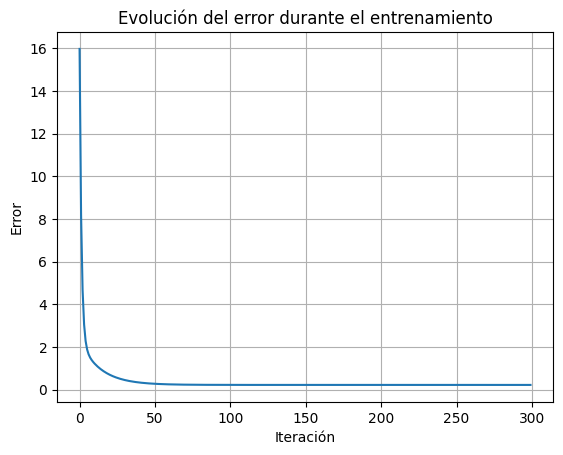

In [95]:
#Graficamos la evolución del error
plt.plot(range(iteracion), errores)
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Evolución del error durante el entrenamiento')
plt.grid()
plt.show()

In [96]:
# Imprimimos los coeficientes de la regresión lineal
print(f'Coeficientes de la regresión lineal: {pesos}')
print(f'Error cuadrático medio: {errores[-1]}')

Coeficientes de la regresión lineal: [-3.03327098  3.79997257]
Error cuadrático medio: 0.22222222282256343


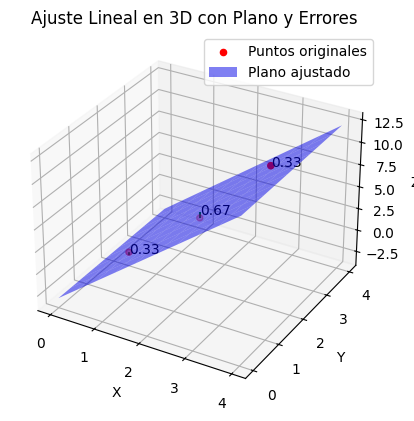

In [97]:
# Representación de la nube de puntos y estimación (gráfico 3D)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, color="r", label="Puntos originales")

# Crear malla para el plano
x_vals = np.linspace(min(x) - 1, max(x) + 1, 10)
y_vals = np.linspace(min(y) - 1, max(y) + 1, 10)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = pesos[0] + pesos[1] * x_vals

# Dibujar el plano
ax.plot_surface(x_vals, y_vals, z_vals, alpha=0.5, color="blue", label="Plano ajustado")

# Líneas de error y etiquetas
for xi, yi, zi in puntos:
    z_est = pesos[0] + pesos[1] * xi
    ax.plot([xi, xi], [yi, yi], [zi, z_est], "g--")
    error = np.abs(zi - z_est)
    ax.text(xi, yi, (zi + z_est) / 2, f"{error:.2f}", color="black")

# Establecer etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Ajuste Lineal en 3D con Plano y Errores")
ax.legend()

plt.show()

In [98]:
# Imprimimos los valores aproximados:
for xi, yi, zi in puntos:
    z_est = pesos[0] + pesos[1] * xi
    print(f"Para el punto ({xi}, {yi}, {zi}) el valor estimado es {z_est}\nResta: {zi - z_est}\nError cuadrático: {(zi - z_est)**2}\n")
    

Para el punto (1, 1, 1.1) el valor estimado es 0.7667015930846448
Resta: 0.3332984069153553
Error cuadrático: 0.11108782805231375

Para el punto (2, 2, 3.9) el valor estimado es 4.566674161843268
Resta: -0.6666741618432677
Error cuadrático: 0.4444544380694235

Para el punto (3, 3, 8.7) el valor estimado es 8.36664673060189
Resta: 0.33335326939810983
Error cuadrático: 0.11112440221840879

